In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes_data.csv', delimiter=';')
# View the first few rows of the dataset
print(data.head())

   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   
3   45   Male         0           0                   1         1           1   
4   60   Male         1           1                   1         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   
3               1                0        1             0                1   
4               0                1        1             1                1   

   partial_paresis  muscle_stiffness  alopec

##Graph -2 Age Distributionn of diabetic v/s Non- diabetic Individuals

The age distribution analysis suggests that while diabetes affects a broad age range, including both younger and older individuals, diabetic individuals tend to have a slightly higher average and median age compared to non-diabetic individuals. This pattern might hint at age being a risk factor for diabetes

In [6]:

# Check for data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())


age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                  int64
dtype: object
age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


In [128]:
# Summary statistics
print(data.describe())

              age    polyuria  polydipsia  sudden_weight_loss    weakness  \
count  520.000000  520.000000  520.000000          520.000000  520.000000   
mean    48.028846    0.496154    0.448077            0.417308    0.586538   
std     12.151466    0.500467    0.497776            0.493589    0.492928   
min     16.000000    0.000000    0.000000            0.000000    0.000000   
25%     39.000000    0.000000    0.000000            0.000000    0.000000   
50%     47.500000    0.000000    0.000000            0.000000    1.000000   
75%     57.000000    1.000000    1.000000            1.000000    1.000000   
max     90.000000    1.000000    1.000000            1.000000    1.000000   

       polyphagia  genital_thrush  visual_blurring     itching  irritability  \
count  520.000000      520.000000       520.000000  520.000000    520.000000   
mean     0.455769        0.223077         0.448077    0.486538      0.242308   
std      0.498519        0.416710         0.497776    0.500300    

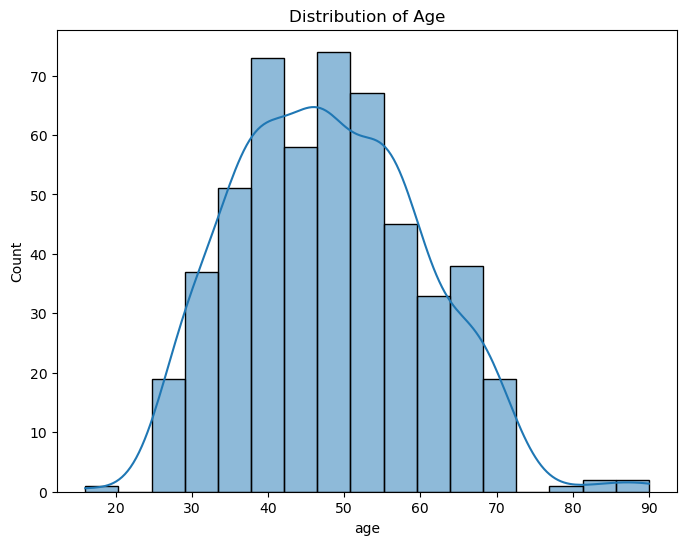

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical feature (e.g., age)
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.show()


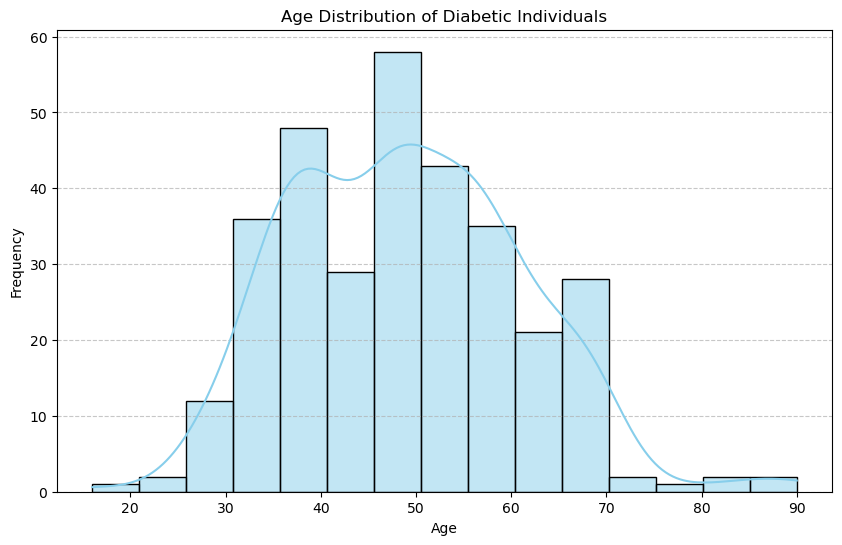

Summary Statistics for Age of Diabetic Individuals:
 count    320.000000
mean      49.071875
std       12.097481
min       16.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: age, dtype: float64


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded as 'data'

# Filter for diabetic individuals only (class == 1)
diabetic_data = data[data['class'] == 1]

# Plot the age distribution for diabetic individuals
plt.figure(figsize=(10, 6))

# Using a histogram and KDE plot to visualize age distribution
sns.histplot(diabetic_data['age'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Diabetic Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Optional: Show summary statistics for age in diabetic individuals
age_stats = diabetic_data['age'].describe()
print("Summary Statistics for Age of Diabetic Individuals:\n", age_stats)


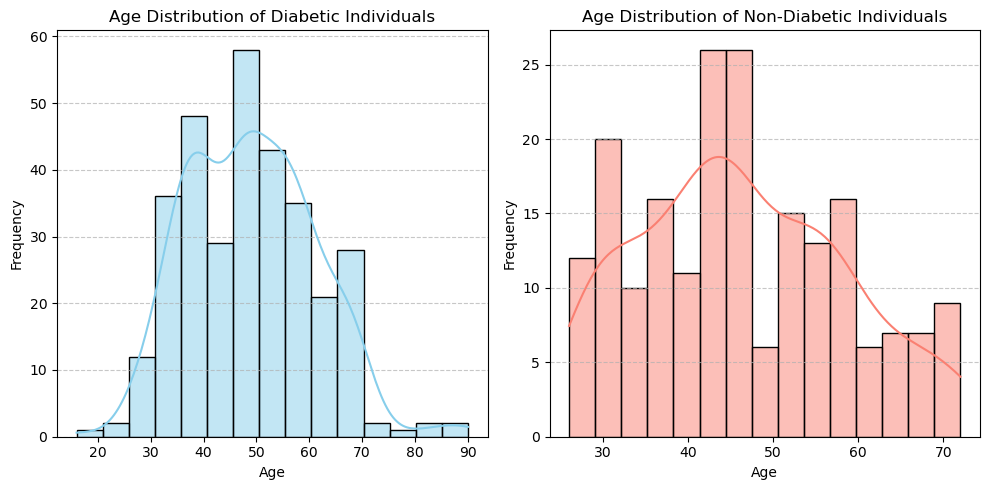

Summary Statistics for Age of Diabetic Individuals:
 count    320.000000
mean      49.071875
std       12.097481
min       16.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: age, dtype: float64

Summary Statistics for Age of Non-Diabetic Individuals:
 count    200.000000
mean      46.360000
std       12.080983
min       26.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       72.000000
Name: age, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded as 'data'

# Filter for diabetic and non-diabetic individuals
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

# Set up the subplot grid
plt.figure(figsize=(10, 5))

# Plot the age distribution for diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Diabetic Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot the age distribution for non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], bins=15, kde=True, color='salmon', edgecolor='black')
plt.title("Age Distribution of Non-Diabetic Individuals")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Show summary statistics for age in both groups
print("Summary Statistics for Age of Diabetic Individuals:\n", diabetic_data['age'].describe())
print("\nSummary Statistics for Age of Non-Diabetic Individuals:\n", non_diabetic_data['age'].describe())


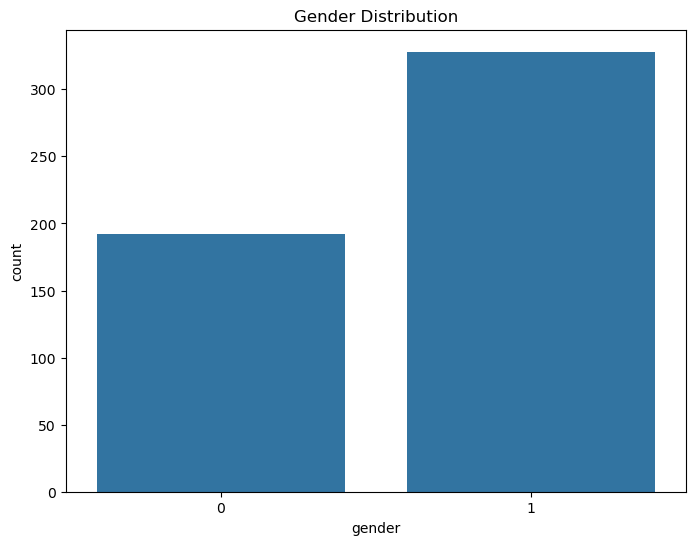

Gender Distribution:
1: Count = 328, Percentage = 63.08%
0: Count = 192, Percentage = 36.92%


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame

# Bar plot for categorical feature (e.g., gender)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Calculate and print counts and percentages for gender
gender_counts = data['gender'].value_counts()
gender_percentages = data['gender'].value_counts(normalize=True) * 100

print("Gender Distribution:")
for gender, count in gender_counts.items():
    percentage = gender_percentages[gender]
    print(f"{gender}: Count = {count}, Percentage = {percentage:.2f}%")

# # Bar plot for target variable (diabetes classification)
# plt.figure(figsize=(8, 6))
# sns.countplot(x='class', data=data)
# plt.title('Diabetes Classification Distribution')
# plt.show()

# # Calculate and print counts and percentages for diabetes classification
# class_counts = data['class'].value_counts()
# class_percentages = data['class'].value_counts(normalize=True) * 100

# print("\nDiabetes Classification Distribution:")
# for cls, count in class_counts.items():
#     percentage = class_percentages[cls]
#     print(f"{cls}: Count = {count}, Percentage = {percentage:.2f}%")


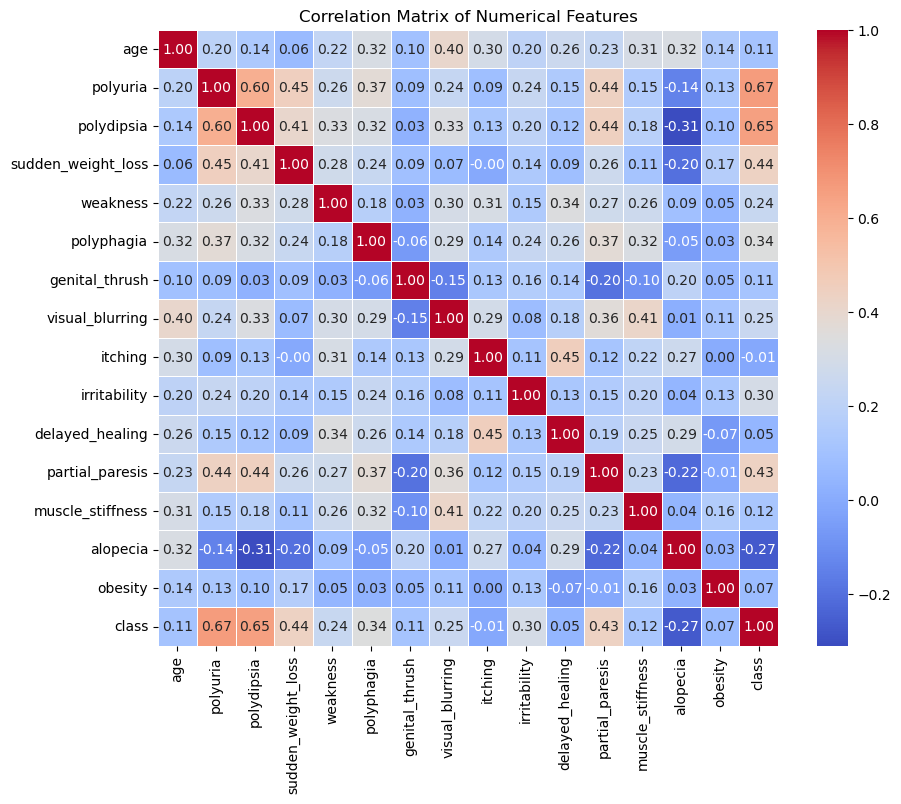

In [73]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



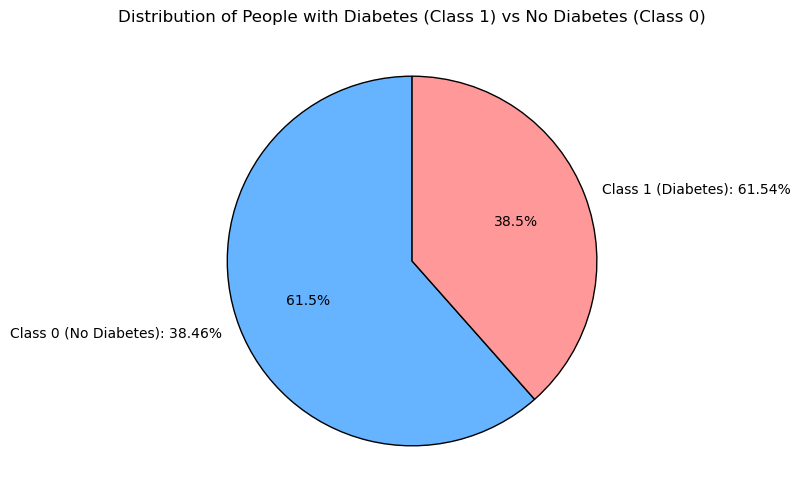

Class 0 (No Diabetes): 200 samples (38.46%)
Class 1 (Diabetes): 320 samples (61.54%)


In [82]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (diabetes vs no diabetes)
class_counts = data['class'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / class_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=[f"Class 0 (No Diabetes): {class_percentages[0]:.2f}%", 
                              f"Class 1 (Diabetes): {class_percentages[1]:.2f}%"], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of People with Diabetes (Class 1) vs No Diabetes (Class 0)')
plt.show()

# Print the class counts and percentages for reference
print(f"Class 0 (No Diabetes): {class_counts[0]} samples ({class_percentages[0]:.2f}%)")
print(f"Class 1 (Diabetes): {class_counts[1]} samples ({class_percentages[1]:.2f}%)")


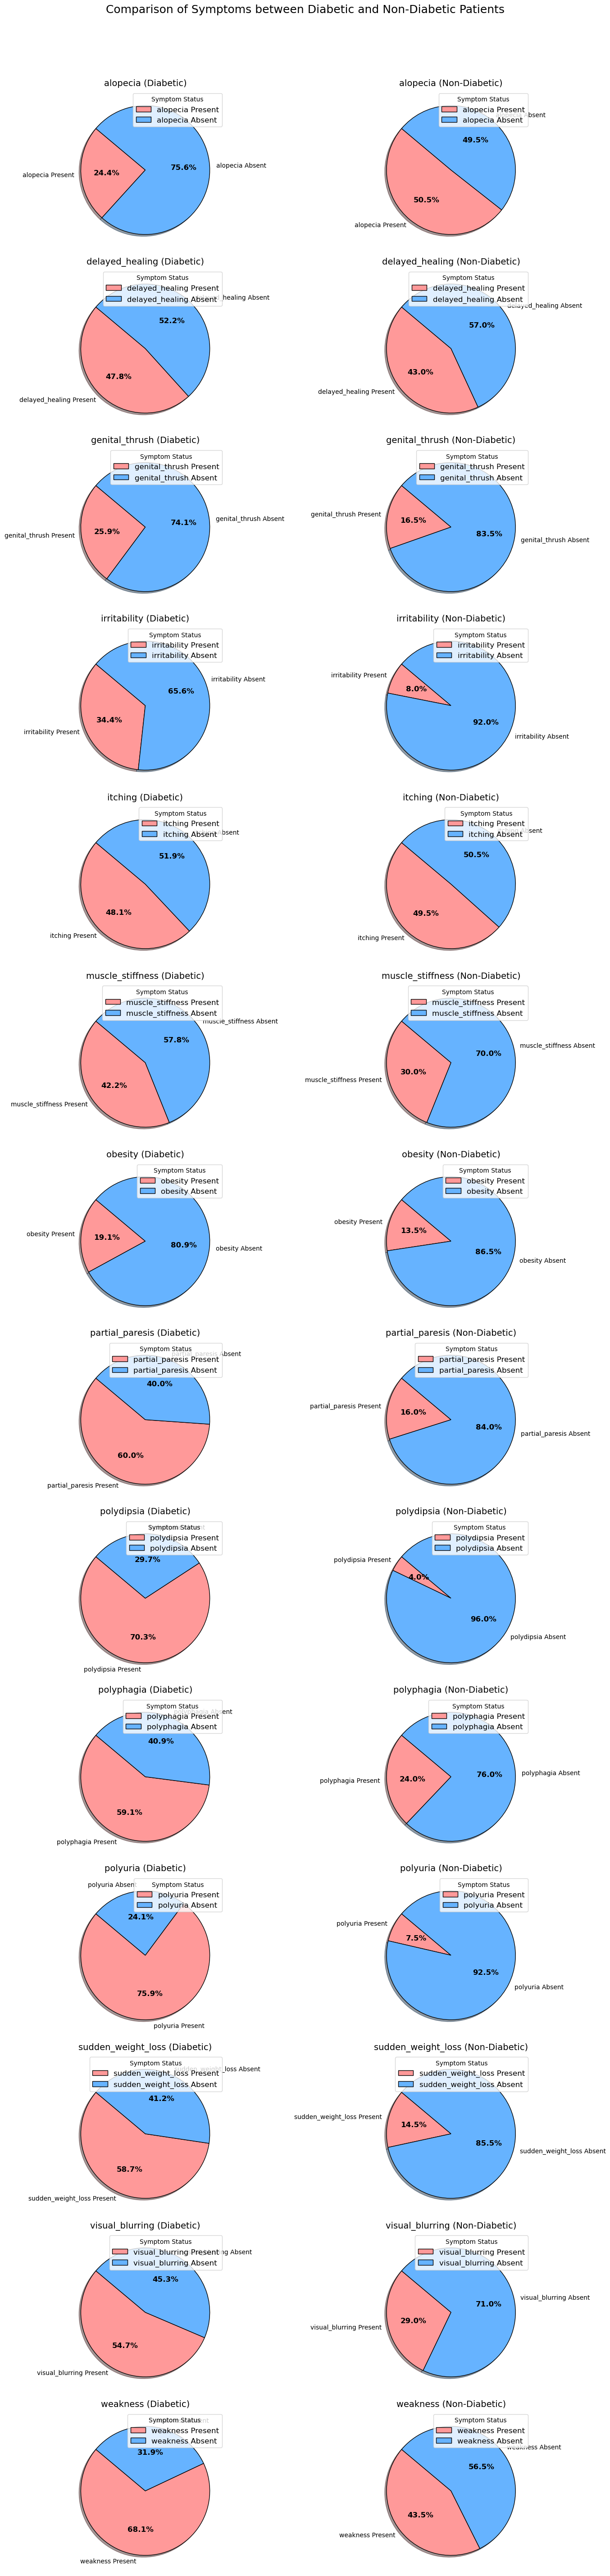

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate diabetic and non-diabetic data
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

# Calculate the total number of diabetic and non-diabetic patients
total_diabetic = len(diabetic_data)
total_non_diabetic = len(non_diabetic_data)

# Get all symptom columns (excluding age, gender, and class)
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Set up the plotting layout
num_symptoms = len(symptom_columns)
fig, axes = plt.subplots(num_symptoms, 2, figsize=(14, num_symptoms * 4))
fig.suptitle("Comparison of Symptoms between Diabetic and Non-Diabetic Patients", y=1.02, fontsize=18)

# Generate side-by-side pie charts for each symptom
for i, symptom in enumerate(symptom_columns):
    # Calculate the counts for each symptom in both groups
    diabetic_count = diabetic_data[symptom].sum()
    non_diabetic_count = non_diabetic_data[symptom].sum()
    
    # Calculate the absence of the symptom in each group
    diabetic_no_symptom = total_diabetic - diabetic_count
    non_diabetic_no_symptom = total_non_diabetic - non_diabetic_count
    
    # Prepare data for pie charts
    diabetic_counts = [diabetic_count, diabetic_no_symptom]
    non_diabetic_counts = [non_diabetic_count, non_diabetic_no_symptom]
    
    # Define labels and colors
    labels = [f'{symptom} Present', f'{symptom} Absent']
    colors = ['#ff9999','#66b3ff']
    
    # Diabetic patients pie chart
    wedges1, texts1, autotexts1 = axes[i, 0].pie(diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 0].set_title(f"{symptom} (Diabetic)", fontsize=14)
    axes[i, 0].legend(wedges1, labels, title="Symptom Status", loc="upper right", fontsize=12)
    for text in autotexts1:
        text.set_fontsize(12)
        text.set_fontweight('bold')

    # Non-diabetic patients pie chart
    wedges2, texts2, autotexts2 = axes[i, 1].pie(non_diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 1].set_title(f"{symptom} (Non-Diabetic)", fontsize=14)
    axes[i, 1].legend(wedges2, labels, title="Symptom Status", loc="upper right", fontsize=12)
    for text in autotexts2:
        text.set_fontsize(12)
        text.set_fontweight('bold')

# Adjust layout to prevent overlapping of titles and legends
plt.tight_layout()
plt.show()


Total number of diabetic individuals: 320
Total number of non-diabetic individuals: 200


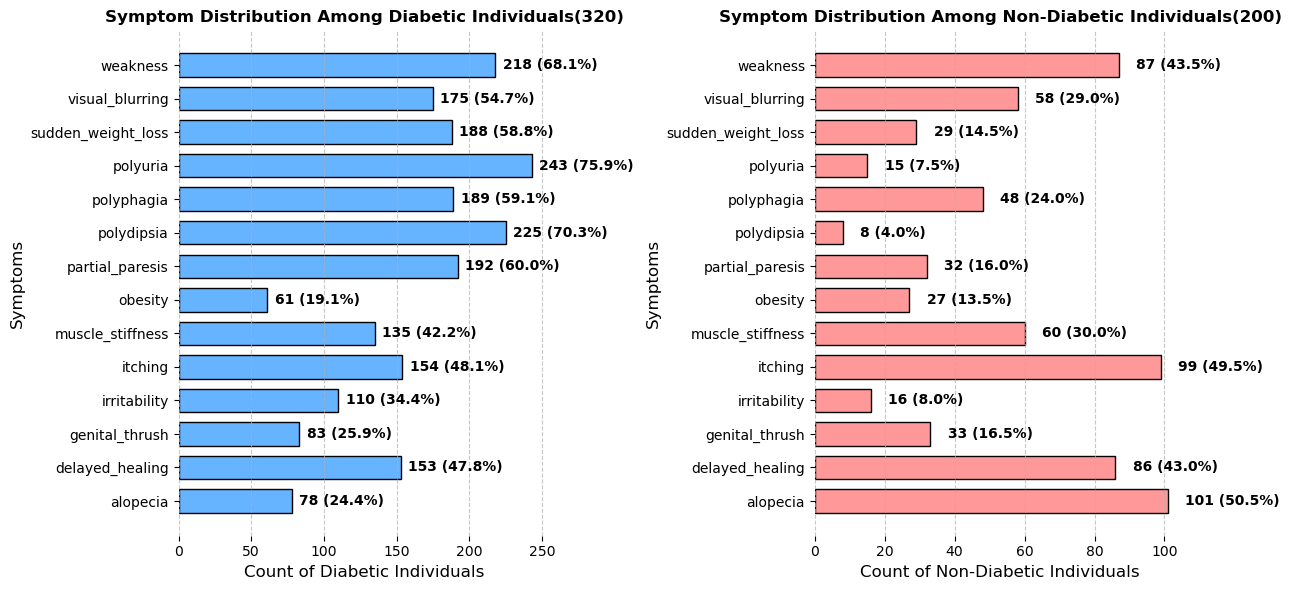

In [34]:
import matplotlib.pyplot as plt

# Filter data for diabetic individuals (class == 1)
diabetic_data = data[data['class'] == 1]
total_diabetic = len(diabetic_data)
print(f"Total number of diabetic individuals: {total_diabetic}")

# Count how many diabetic individuals have each symptom
diabetic_symptom_counts = diabetic_data[symptom_columns].sum()

# Filter data for non-diabetic individuals (class == 0)
non_diabetic_data = data[data['class'] == 0]
total_non_diabetic = len(non_diabetic_data)
print(f"Total number of non-diabetic individuals: {total_non_diabetic}")

# Count how many non-diabetic individuals have each symptom
non_diabetic_symptom_counts = non_diabetic_data[symptom_columns].sum()

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Plot bar chart for diabetic individuals (using the original color)
axes[0].barh(diabetic_symptom_counts.index, diabetic_symptom_counts, color='#66b3ff', edgecolor='black', height=0.7)
for i, v in enumerate(diabetic_symptom_counts):
    axes[0].text(v + 5, i, f'{v} ({(v / total_diabetic) * 100:.1f}%)', va='center', ha='left', fontsize=10, fontweight='bold')

axes[0].set_title("Symptom Distribution Among Diabetic Individuals(320)", fontsize=12, fontweight='bold')
axes[0].set_xlabel('Count of Diabetic Individuals', fontsize=12)
axes[0].set_ylabel('Symptoms', fontsize=12)
axes[0].grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove the box (spines) around the chart for diabetic individuals
for spine in axes[0].spines.values():
    spine.set_visible(False)

# Plot bar chart for non-diabetic individuals (using the original color)
axes[1].barh(non_diabetic_symptom_counts.index, non_diabetic_symptom_counts, color='#ff9999', edgecolor='black', height=0.7)
for i, v in enumerate(non_diabetic_symptom_counts):
    axes[1].text(v + 5, i, f'{v} ({(v / total_non_diabetic) * 100:.1f}%)', va='center', ha='left', fontsize=10, fontweight='bold')

axes[1].set_title("Symptom Distribution Among Non-Diabetic Individuals(200)", fontsize=12, fontweight='bold')
axes[1].set_xlabel('Count of Non-Diabetic Individuals', fontsize=12)
axes[1].set_ylabel('Symptoms', fontsize=12)
axes[1].grid(True, axis='x', linestyle='--', alpha=0.7)

# Remove the box (spines) around the chart for non-diabetic individuals
for spine in axes[1].spines.values():
    spine.set_visible(False)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


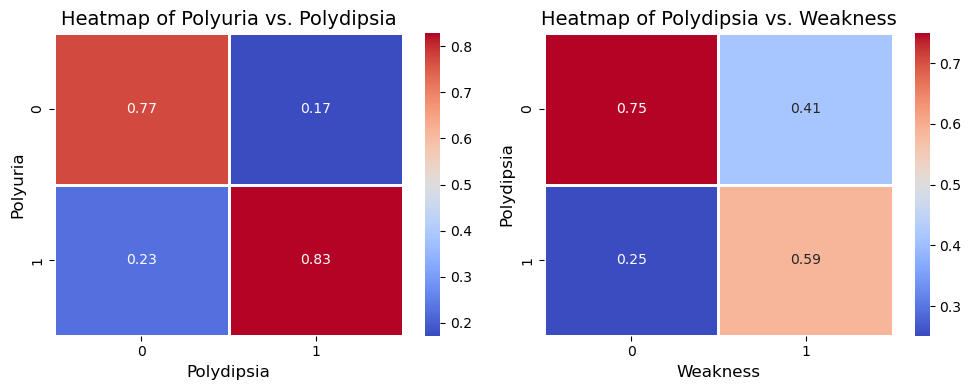

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and has the columns `polyuria`, `polydipsia`, and `weakness`

# Create crosstab matrices for polyuria vs. polydipsia and polydipsia vs. weakness
polyuria_polydipsia_corr = pd.crosstab(data['polyuria'], data['polydipsia'], normalize='columns')
polydipsia_weakness_corr = pd.crosstab(data['polydipsia'], data['weakness'], normalize='columns')

# Set up the subplot grid
plt.figure(figsize=(10, 4))

# Plot Heatmap for polyuria vs. polydipsia
plt.subplot(1, 2, 1)
sns.heatmap(polyuria_polydipsia_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Heatmap of Polyuria vs. Polydipsia', fontsize=14)
plt.xlabel('Polydipsia', fontsize=12)
plt.ylabel('Polyuria', fontsize=12)

# Plot Heatmap for polydipsia vs. weakness
plt.subplot(1, 2, 2)
sns.heatmap(polydipsia_weakness_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=1)
plt.title('Heatmap of Polydipsia vs. Weakness', fontsize=14)
plt.xlabel('Weakness', fontsize=12)
plt.ylabel('Polydipsia', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


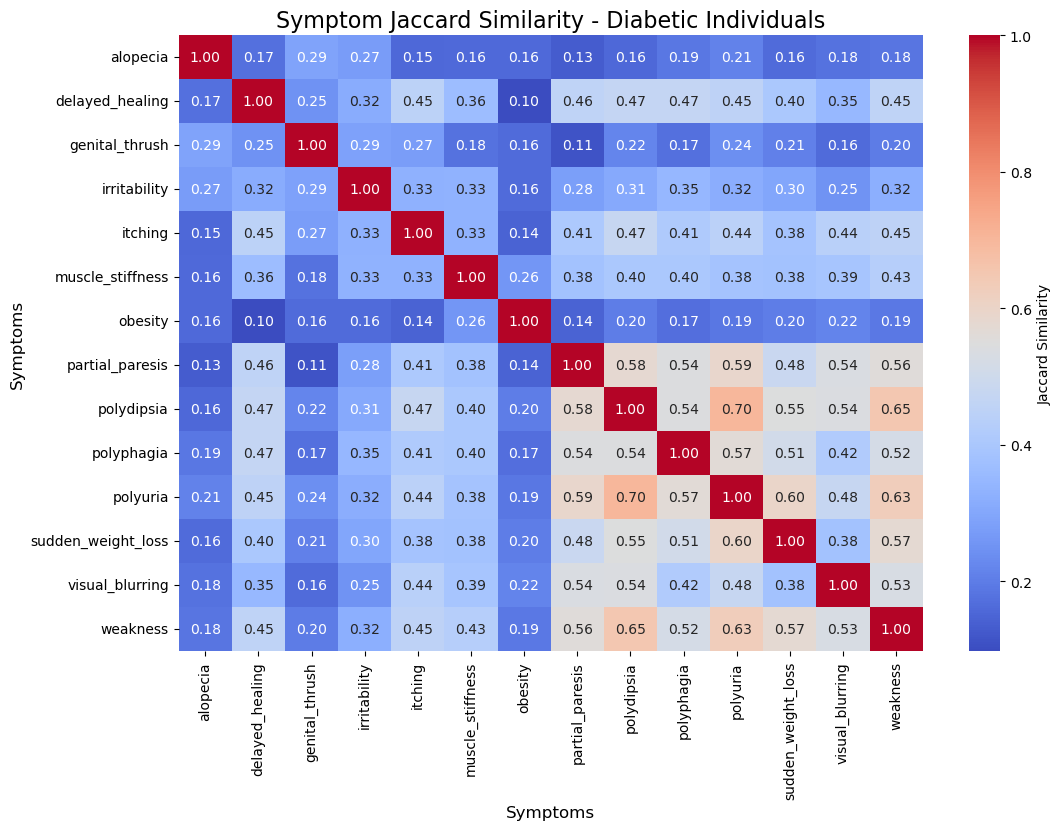

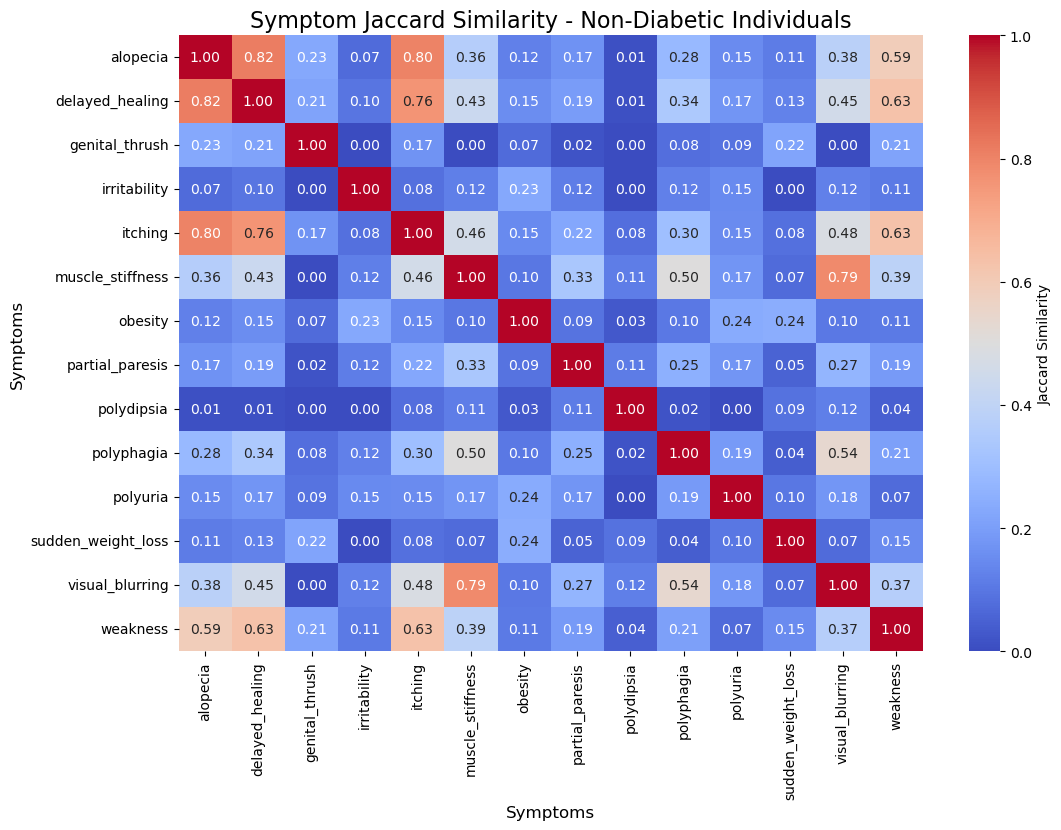

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure symptom columns are numeric
symptom_columns = data.columns.difference(['age', 'gender', 'class'])
data[symptom_columns] = data[symptom_columns].apply(pd.to_numeric, errors='coerce')
data[symptom_columns] = data[symptom_columns].fillna(0)

# Filter data for diabetic and non-diabetic individuals
diabetic_data = data[data['class'] == 1][symptom_columns]
non_diabetic_data = data[data['class'] == 0][symptom_columns]

# Function to calculate Jaccard similarity matrix
def jaccard_similarity(binary_data):
    # Number of symptoms
    n = binary_data.shape[1]
    jaccard_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            # Intersection: Sum of instances where both symptoms i and j are present
            intersection = np.sum(binary_data.iloc[:, i] & binary_data.iloc[:, j])
            # Union: Sum of instances where either symptom i or j is present
            union = np.sum(binary_data.iloc[:, i] | binary_data.iloc[:, j])
            jaccard_matrix[i, j] = intersection / union if union != 0 else 0

    return pd.DataFrame(jaccard_matrix, index=binary_data.columns, columns=binary_data.columns)

# Calculate Jaccard similarity matrices for diabetic and non-diabetic individuals
diabetic_jaccard = jaccard_similarity(diabetic_data)
non_diabetic_jaccard = jaccard_similarity(non_diabetic_data)

# Plot Jaccard similarity heatmap for diabetic individuals
plt.figure(figsize=(12, 8))
sns.heatmap(diabetic_jaccard, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Jaccard Similarity'})
plt.title("Symptom Jaccard Similarity - Diabetic Individuals", fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Symptoms', fontsize=12)
plt.show()

# Plot Jaccard similarity heatmap for non-diabetic individuals
plt.figure(figsize=(12, 8))
sns.heatmap(non_diabetic_jaccard, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Jaccard Similarity'})
plt.title("Symptom Jaccard Similarity - Non-Diabetic Individuals", fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Symptoms', fontsize=12)
plt.show()


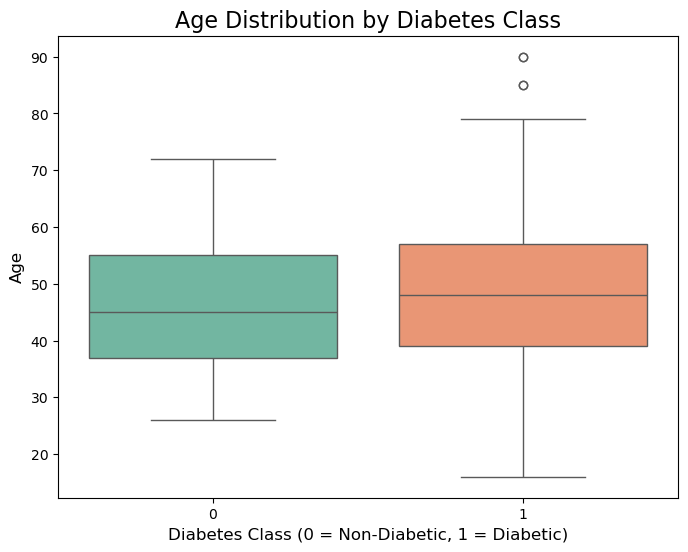

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(8, 6))

# Create a box plot for age, with 'class' as both x and hue, setting legend to False
sns.boxplot(x='class', y='age', data=data, hue='class', palette="Set2", dodge=False, legend=False)

# Add plot labels and title
plt.title("Age Distribution by Diabetes Class", fontsize=16)
plt.xlabel("Diabetes Class (0 = Non-Diabetic, 1 = Diabetic)", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Display the plot
plt.show()


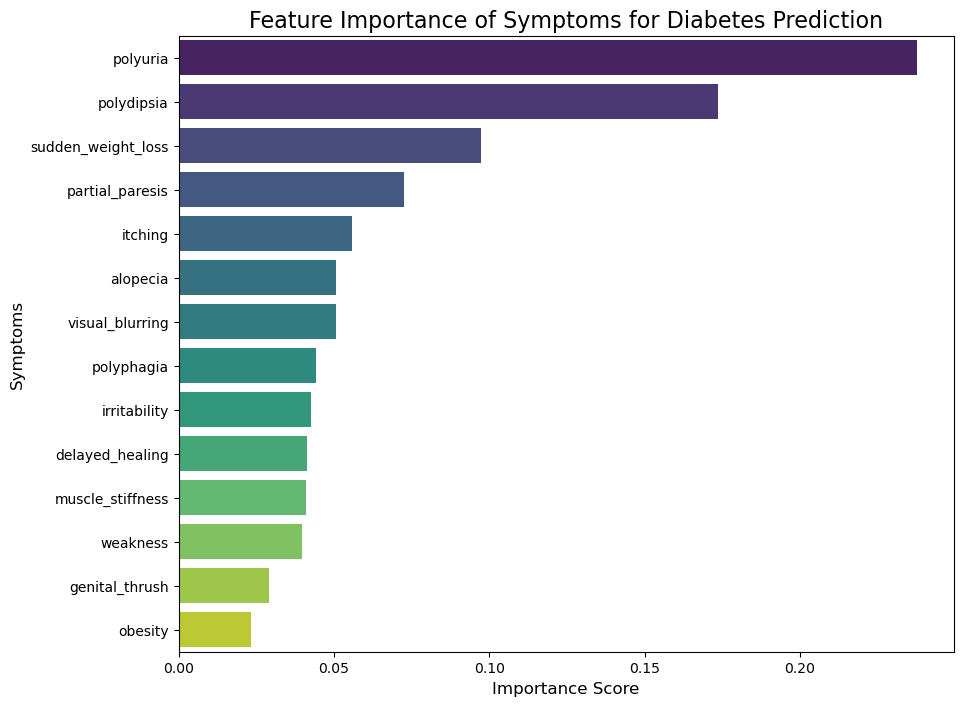

In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features (symptoms) and target (diabetes class)
symptom_columns = data.columns.difference(['age', 'gender', 'class'])
X = data[symptom_columns]
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Symptom': symptom_columns,
    'Importance': feature_importances
})

# Sort by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Symptom', data=importance_df, hue='Symptom', dodge=False, palette="viridis", legend=False)
plt.title("Feature Importance of Symptoms for Diabetes Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.show()


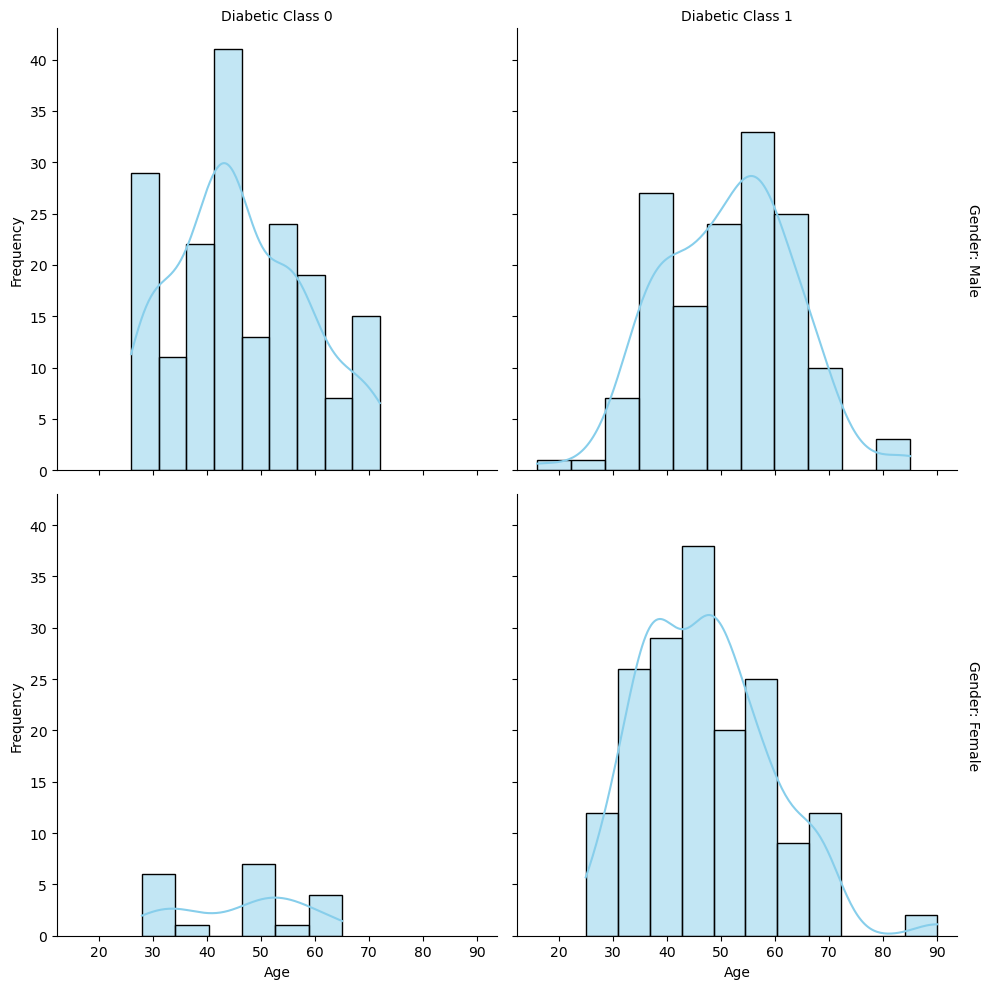

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to explore multiple symptoms across 'class' and 'gender'
g = sns.FacetGrid(data, col='class', row='gender', margin_titles=True, height=5)

# Plot histograms for selected symptoms (e.g., 'polyuria', 'polydipsia', 'age') within each facet
g.map(sns.histplot, 'age', kde=True, color='skyblue')

# Add titles and labels
g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='Diabetic Class {col_name}', row_template='Gender: {row_name}')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\2004a\AppData\Local\Temp\ipykernel_2356\3766149487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='age', data=data, inner='quart', palette='muted')


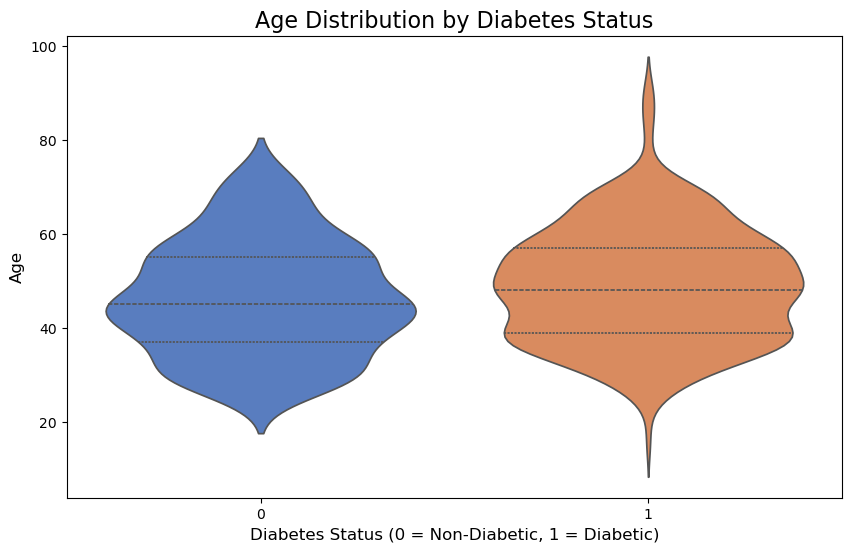

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot for Age by Class (Diabetic vs Non-Diabetic)
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='age', data=data, inner='quart', palette='muted')

# Customizing the plot
plt.title('Age Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.show()


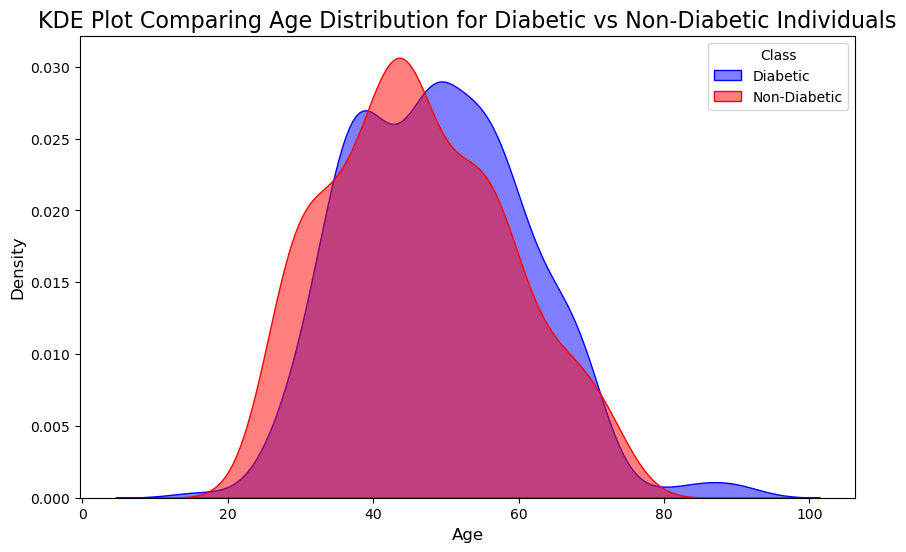

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create KDE plots to compare age distribution for diabetic and non-diabetic individuals
plt.figure(figsize=(10, 6))

# KDE plot for diabetic individuals
sns.kdeplot(data=data[data['class'] == 1], x='age', fill=True, label='Diabetic', color='blue', alpha=0.5)

# KDE plot for non-diabetic individuals
sns.kdeplot(data=data[data['class'] == 0], x='age', fill=True, label='Non-Diabetic', color='red', alpha=0.5)

# Add titles and labels
plt.title('KDE Plot Comparing Age Distribution for Diabetic vs Non-Diabetic Individuals', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Class', loc='upper right')

# Display the plot
plt.show()


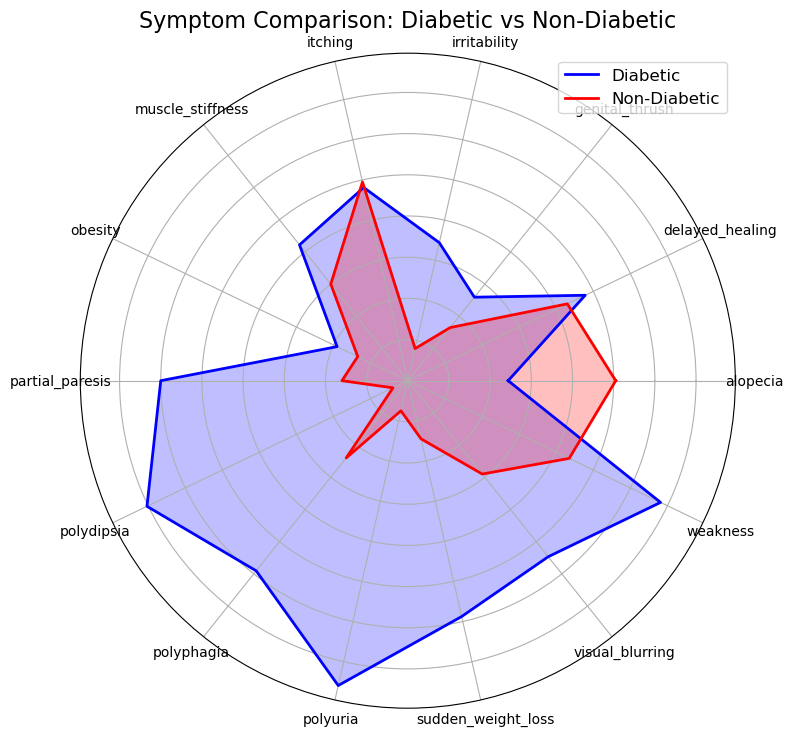

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset 'data' contains binary symptom columns

# List of symptom columns
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Aggregate the data by calculating the mean for each symptom (percentage of people with the symptom)
diabetic_symptom_data = data[data['class'] == 1][symptom_columns].mean()
non_diabetic_symptom_data = data[data['class'] == 0][symptom_columns].mean()

# Function to create a radar plot
def radar_plot(data1, data2, categories, title='Radar Plot'):
    # Number of variables (symptoms)
    num_vars = len(categories)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so the first point is repeated to close the circle
    data1 = data1.tolist()
    data2 = data2.tolist()
    data1.append(data1[0])
    data2.append(data2[0])
    angles.append(angles[0])

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot data for Diabetic individuals
    ax.plot(angles, data1, color='blue', linewidth=2, label='Diabetic', linestyle='solid')
    ax.fill(angles, data1, color='blue', alpha=0.25)

    # Plot data for Non-Diabetic individuals
    ax.plot(angles, data2, color='red', linewidth=2, label='Non-Diabetic', linestyle='solid')
    ax.fill(angles, data2, color='red', alpha=0.25)

    # Set the labels and title
    ax.set_yticklabels([])  # Hide radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45, fontsize=10)
    ax.set_title(title, fontsize=16)
    
    # Add a legend
    plt.legend(loc='upper right', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Create Radar Plot comparing diabetic and non-diabetic individuals
radar_plot(diabetic_symptom_data, non_diabetic_symptom_data, symptom_columns, title='Symptom Comparison: Diabetic vs Non-Diabetic')


In [75]:
pip install upsetplot



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24862 sha256=5980004124a021d606ee19b50f14ba5d5d46da9595b895a128e976d8e4f83894
  Stored in directory: c:\users\2004a\appdata\local\pip\cache\wheels\7b\ce\88\1d0bce5b2680165c29c3e68416325e79674d5a9f422d037996
Successfully built upsetplot


C:\Users\2004a\AppData\Local\Temp\ipykernel_12732\2010016703.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Symptom', data=importance_df, palette="viridis")


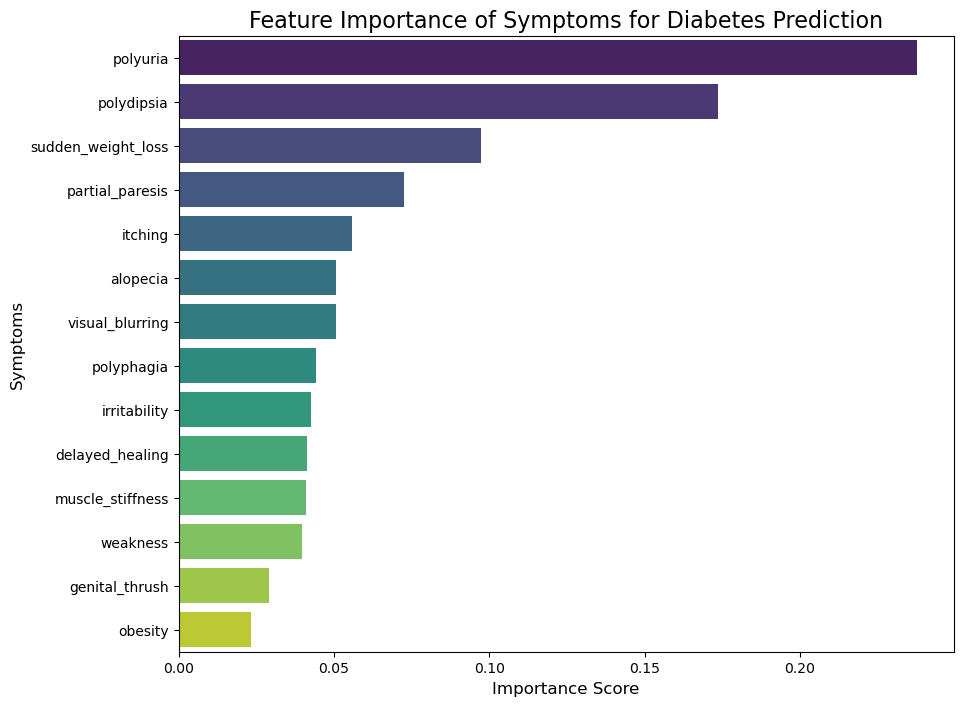

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is already loaded and contains the dataset
# Define the features (symptoms) and target (diabetes class)
symptom_columns = data.columns.difference(['age', 'gender', 'class'])
X = data[symptom_columns]
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({
    'Symptom': symptom_columns,
    'Importance': feature_importances
})

# Sort by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Symptom', data=importance_df, palette="viridis")
plt.title("Feature Importance of Symptoms for Diabetes Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.show()


C:\Users\2004a\AppData\Local\Temp\ipykernel_12732\3702838047.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")


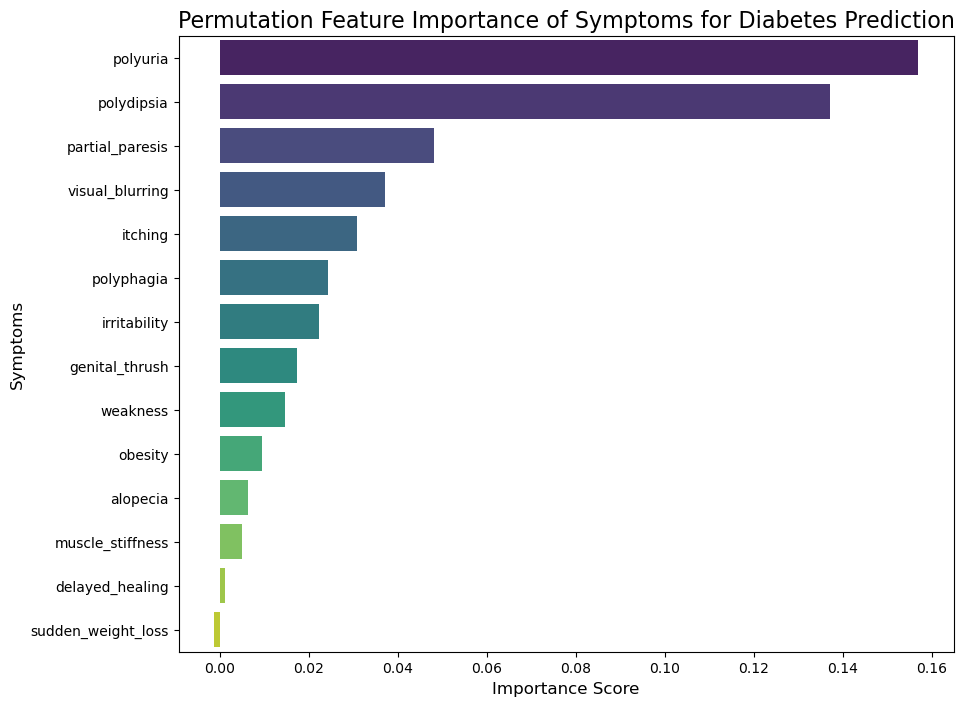

In [8]:
from sklearn.inspection import permutation_importance

# Get permutation feature importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for easier plotting
perm_importance_df = pd.DataFrame({
    'Symptom': symptom_columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance score in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")
plt.title("Permutation Feature Importance of Symptoms for Diabetes Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.show()
